# Practice 9 - kNN, Decision Tree, SVM

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [2]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [3]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [4]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [48]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [49]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [50]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [51]:
target = target.replace({0:1, 1:0})
target.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


## Subject

We consider two predictors: mean radius and mean texture.
* Train a k-NN with k=5 and plot the decision areas based on that model.
* Explore different values of k to determine an optimal value.
* Train a Decision Tree and plot the decision areas based on that model.
* What would be an optimal value for the depth of the Decision Tree? Hint: you can use parameter max_depth of DecisionTreeClassifier.
* Train a Random Forest and plot the decision areas based on that model.
* Train a SVM and plot the decision areas based on that model.
* Compare the performance between all that models.

**Preparing dataset**

In [52]:
df = pd.DataFrame(np.c_[data_all['data'], data_all['target']],
                  columns= np.append(data_all['feature_names'], ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [53]:
type(df['target'])

pandas.core.series.Series

In [54]:
conditions = [
    (df['target']== 0.0), 
    (df['target']== 1.0)
]

In [55]:
values = ['benign', 'malignant']

In [56]:
df['target'] = np.select(conditions, values)

In [57]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,benign


In [58]:
a = df['target'].value_counts()
a

malignant    357
benign       212
Name: target, dtype: int64

In [59]:
# feature_list = ['mean radius', 'mean texture']

# fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
# for i_axs in range(len(feature_list)):
#     for i_purchase, purchase in enumerate(['benign', 'malignant']):
#         (df[feature_list[i_axs]][df['target']=='malignant']).plot(kind='density', label=purchase, c=['red', 'green'][i_purchase], ax=axs[i_axs])
#     axs[i_axs].set_xlabel(feature_list[i_axs])
#     axs[i_axs].legend(title='Tumor Type')
# plt.show() 

In [60]:
X = df[['mean radius', 'mean texture']].values
X[:5]

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       [11.42, 20.38],
       [20.29, 14.34]])

In [61]:
print(df['target'][:20].values)

['benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant']


### Preparing dataset

**Encoding**

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['target'])
print(y[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


**Train/Test split**

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 2) (426,)
Test set: (143, 2) (143,)


In [64]:
print(X_train[:10])

[[11.85  17.46 ]
 [11.22  19.86 ]
 [20.13  28.25 ]
 [13.59  17.84 ]
 [16.69  20.2  ]
 [12.06  18.9  ]
 [13.87  16.21 ]
 [12.56  19.07 ]
 [14.26  19.65 ]
 [ 9.029 17.33 ]]


**Feature Scaling**

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
X_train[:10]

array([[-0.65079907, -0.43057322],
       [-0.82835341,  0.15226547],
       [ 1.68277234,  2.18977235],
       [-0.16041087, -0.33829042],
       [ 0.71326925,  0.23483428],
       [-0.59161428, -0.08087001],
       [-0.08149783, -0.73413503],
       [-0.45069814, -0.0395856 ],
       [ 0.02841677,  0.10126708],
       [-1.44584797, -0.46214364]])

### Training a KNN Model

In [253]:
from sklearn.neighbors import KNeighborsClassifier
knn = {'classifier': KNeighborsClassifier(n_neighbors = 29, metric = 'minkowski', p = 2)}
# knn = {'classifier': KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)}
# knn = {'classifier': KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)}
knn['classifier'].fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [254]:
print(label_encoder.inverse_transform(knn['classifier'].predict(sc.transform([[14,14]]))))

['malignant']


In [255]:
print(label_encoder.inverse_transform(knn['classifier'].predict(sc.transform([[16,17]]))))

['malignant']


In [256]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn['classifier'].predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.903755868544601
Test set Accuracy:  0.9020979020979021


In [257]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.81118881, 0.8041958 , 0.84615385, 0.84615385, 0.86713287,
       0.85314685, 0.86713287, 0.87412587, 0.87412587, 0.88111888,
       0.88811189, 0.88111888, 0.87412587, 0.88111888, 0.88111888,
       0.87412587, 0.87412587, 0.88111888, 0.88111888, 0.87412587,
       0.88111888, 0.8951049 , 0.8951049 , 0.8951049 , 0.90909091,
       0.9020979 , 0.90909091, 0.90909091, 0.91608392, 0.91608392,
       0.91608392, 0.91608392, 0.91608392, 0.91608392, 0.91608392,
       0.91608392, 0.91608392, 0.91608392, 0.90909091, 0.9020979 ,
       0.9020979 , 0.8951049 , 0.8951049 , 0.9020979 , 0.9020979 ,
       0.90909091, 0.9020979 , 0.8951049 , 0.9020979 ])

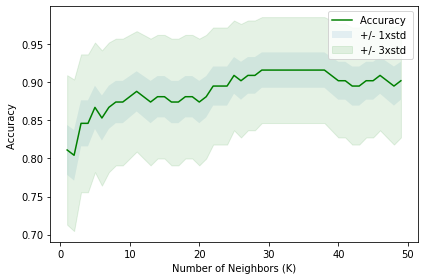

In [258]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [457]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.916083916083916 with k= 29


### Training a Decision Tree Model

In [458]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0)}
# dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 4)}
dt['classifier'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [459]:
print(label_encoder.inverse_transform(dt['classifier'].predict(sc.transform([[16,17]]))))

['benign']


In [460]:
print(label_encoder.inverse_transform(dt['classifier'].predict(sc.transform([[14,14]]))))

['malignant']


In [461]:
dt['y_pred'] = dt['classifier'].predict(X_test)
y_pred

In [462]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, dt['y_pred']))

DecisionTrees's Accuracy:  0.8601398601398601


In [463]:
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

### Training a SVM model

In [464]:
from sklearn.svm import SVC
svm = {'classifier': SVC(kernel = 'linear', random_state = 0, probability = True)}
svm['classifier'].fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [465]:
print(label_encoder.inverse_transform(svm['classifier'].predict(sc.transform([[16,17]]))))

['benign']


In [466]:
print(label_encoder.inverse_transform(svm['classifier'].predict(sc.transform([[14,14]]))))

['malignant']


### Making Predictions

In [268]:
knn['y_proba'] = knn['classifier'].predict_proba(X_test)
knn['y_proba'][:10]

array([[0.37931034, 0.62068966],
       [0.48275862, 0.51724138],
       [0.10344828, 0.89655172],
       [0.20689655, 0.79310345],
       [0.03448276, 0.96551724],
       [0.06896552, 0.93103448],
       [0.24137931, 0.75862069],
       [0.10344828, 0.89655172],
       [0.10344828, 0.89655172],
       [0.        , 1.        ]])

In [269]:
dt['y_proba'] = dt['classifier'].predict_proba(X_test)
dt['y_proba'][:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [270]:
svm['y_proba'] = svm['classifier'].predict_proba(X_test)
svm['y_proba'][:10]

array([[0.25205456, 0.74794544],
       [0.44066926, 0.55933074],
       [0.17458374, 0.82541626],
       [0.31539556, 0.68460444],
       [0.12985449, 0.87014551],
       [0.02982695, 0.97017305],
       [0.12958707, 0.87041293],
       [0.04617807, 0.95382193],
       [0.00429491, 0.99570509],
       [0.00463755, 0.99536245]])

**Prediction of the Class and comparison with the true one**

In [271]:
knn['y_pred'] = knn['classifier'].predict(X_test)
print(np.concatenate((knn['y_pred'].reshape(len(knn['y_pred']),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [272]:
dt['y_pred'] = dt['classifier'].predict(X_test)
print(np.concatenate((dt['y_pred'].reshape(len(dt['y_pred']),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [273]:
svm['y_pred'] = svm['classifier'].predict(X_test)
print(np.concatenate((svm['y_pred'].reshape(len(svm['y_pred']),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


### Performance assessment

**Confusion Matrix**

In [274]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn['y_pred'])
print(cm)

[[47  6]
 [ 6 84]]


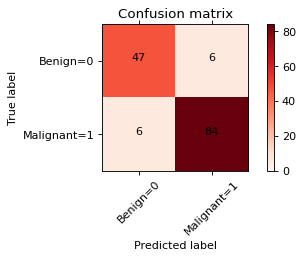

In [275]:
fig = plt.figure(figsize=(5,3), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(cm, cmap = plt.cm.Reds, vmin=0)
fig.colorbar(cax)
classes=['Benign=0','Malignant=1']
ticks = np.arange(len(classes))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="black")
plt.xticks(ticks, classes, rotation=45)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(ticks, classes)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

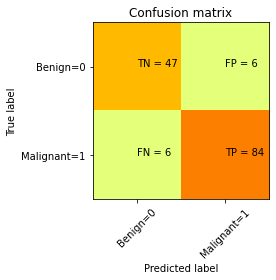

In [276]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn['y_pred'])
 
plt.clf() 
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Perceptron Confusion Matrix - Entire Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
  
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

plt.xticks(ticks, classes, rotation=45)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)        
plt.yticks(ticks, classes)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Accuracy, precision, recall:**

In [277]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [278]:
    print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, knn['y_pred']),2)))
    print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, knn['y_pred']),2)))
    print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, knn['y_pred']),2)))

Accuracy (proportion of correct predictions) is 0.92
Precision (proportion of true purchases among purchase predictions) is 0.93
Recall (proportion of true purchases that are correctly predicted) is 0.93


In [279]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, dt['y_pred']),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, dt['y_pred']),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, dt['y_pred']),2)))

Accuracy (proportion of correct predictions) is 0.86
Precision (proportion of true purchases among purchase predictions) is 0.87
Recall (proportion of true purchases that are correctly predicted) is 0.91


In [280]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, svm['y_pred']),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, svm['y_pred']),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, svm['y_pred']),2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.92
Recall (proportion of true purchases that are correctly predicted) is 0.92


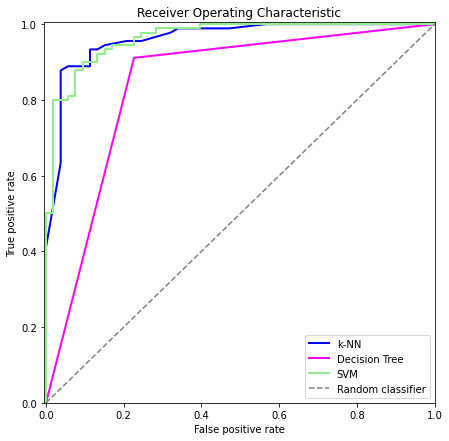

In [281]:
from sklearn.metrics import roc_curve, roc_auc_score


knn['y_score'] = knn['y_proba'][:,1]
dt['y_score'] = dt['y_proba'][:,1]
svm['y_score'] = svm['y_proba'][:,1]

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve for k-NN
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, knn['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='blue', linewidth=2, label='k-NN')
# Plot ROC curve for Decision Tree
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, dt['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='magenta', linewidth=2, label='Decision Tree')
# Plot ROC curve for SVM
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, svm['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='lightgreen', linewidth=2, label='SVM')
# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')
plt.xlim([-0.005, 1])
plt.ylim([0, 1.005])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [282]:
print('AUC for k-NN: ', roc_auc_score(y_test, knn['y_score']))
print('AUC for Decision Tree: ', roc_auc_score(y_test, dt['y_score']))
print('AUC for SVM: ', roc_auc_score(y_test, svm['y_score']))

AUC for k-NN:  0.9617400419287212
AUC for Decision Tree:  0.8423480083857442
AUC for SVM:  0.9647798742138365


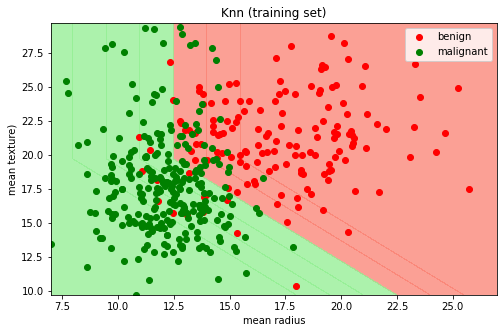

In [283]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,5))

# Preparation of the data set that will be displayed (without scaling)
X_set, y_set = sc.inverse_transform(X_train), label_encoder.inverse_transform(y_train)

# Creation of a data grid (for the decision area)
X_step = 10  # Grid step on X-axis
Y_step = 10  # Grid step on Y-axis
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = X_step),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = Y_step))

# Plotting the decision boundary
plt.contourf(X1, X2, knn['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

# Plotting the data set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)

# Configuration of the figure
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Knn (training set)')
plt.xlabel('mean radius')
plt.ylabel('mean texture)')
plt.legend()

plt.show()

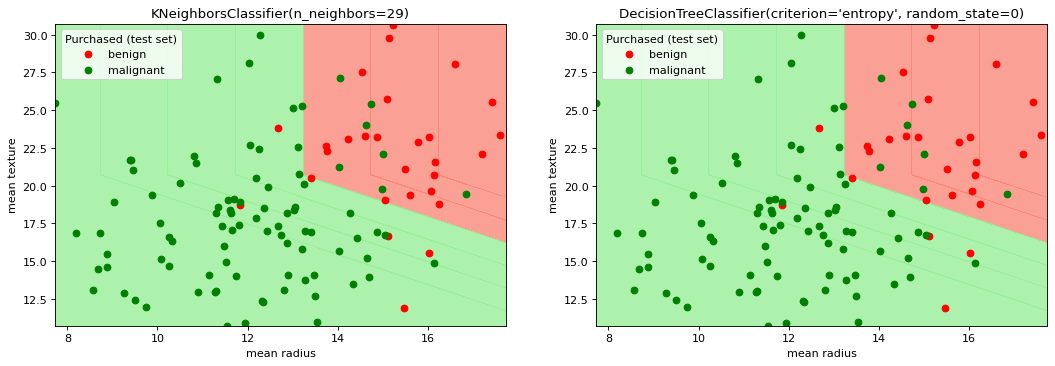

In [284]:
classifier_list = [knn, dt]

from matplotlib.colors import ListedColormap

# Creation of a data grid (for the decision area)
X_step = 10  # Grid step on X-axis
Y_step = 10  # Grid step on Y-axis

# Prepare feature grid
fig, axs = plt.subplots(1,len(classifier_list), figsize=(16,5), dpi= 80)
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = X_step),
    np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = Y_step))

# Loop on classifier 
for i_axs, classifier in enumerate(classifier_list):
    
    axs[i_axs].contourf(X1, X2, classifier['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
    
    for i, j in enumerate(np.unique(y_set)):
        axs[i_axs].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    
    axs[i_axs].set_xlim(X1.min(), X1.max())
    axs[i_axs].set_ylim(X2.min(), X2.max())
    axs[i_axs].legend(title='Purchased (test set)')
#     axs[i_axs].set_title('Logistic Regression (Training set)')
    axs[i_axs].set_title(str(classifier['classifier']))
    axs[i_axs].set_xlabel('mean radius')
    axs[i_axs].set_ylabel('mean texture')

plt.show()

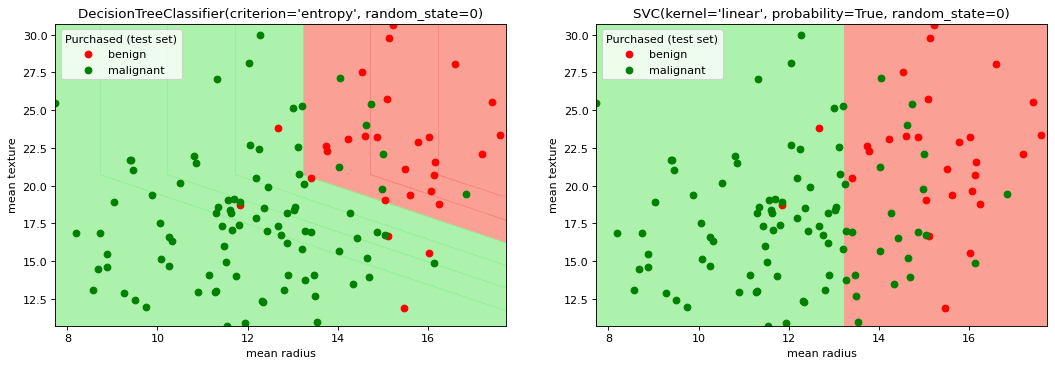

In [285]:
classifier_list = [dt, svm]

from matplotlib.colors import ListedColormap

# Creation of a data grid (for the decision area)
X_step = 10  # Grid step on X-axis
Y_step = 10  # Grid step on Y-axis

# Prepare feature grid
fig, axs = plt.subplots(1,len(classifier_list), figsize=(16,5), dpi= 80)
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = X_step),
    np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = Y_step))

# Loop on classifier 
for i_axs, classifier in enumerate(classifier_list):
    
    axs[i_axs].contourf(X1, X2, classifier['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
    
    for i, j in enumerate(np.unique(y_set)):
        axs[i_axs].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    
    axs[i_axs].set_xlim(X1.min(), X1.max())
    axs[i_axs].set_ylim(X2.min(), X2.max())
    axs[i_axs].legend(title='Purchased (test set)')
#     axs[i_axs].set_title('Logistic Regression (Training set)')
    axs[i_axs].set_title(str(classifier['classifier']))
    axs[i_axs].set_xlabel('mean radius')
    axs[i_axs].set_ylabel('mean texture')

plt.show() 

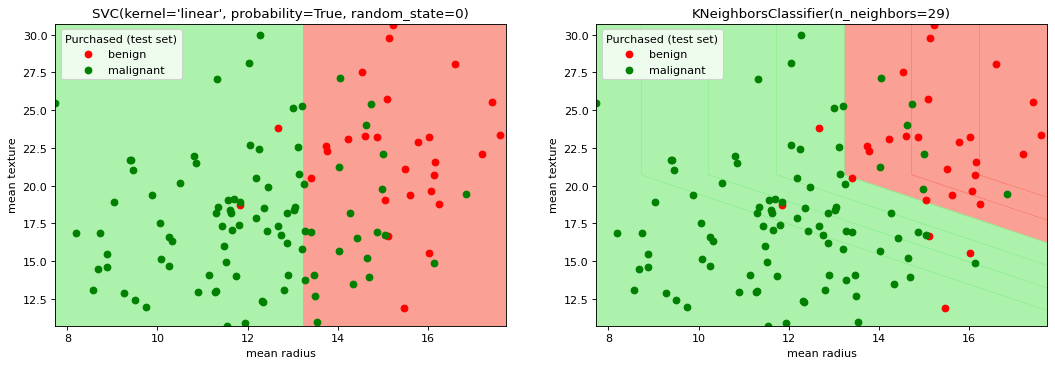

In [286]:
classifier_list = [svm, knn]

from matplotlib.colors import ListedColormap

# Creation of a data grid (for the decision area)
X_step = 10  # Grid step on X-axis
Y_step = 10  # Grid step on Y-axis

# Prepare feature grid
fig, axs = plt.subplots(1,len(classifier_list), figsize=(16,5), dpi= 80)
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = X_step),
    np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = Y_step))

# Loop on classifier 
for i_axs, classifier in enumerate(classifier_list):
    
    axs[i_axs].contourf(X1, X2, classifier['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
    
    for i, j in enumerate(np.unique(y_set)):
        axs[i_axs].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    
    axs[i_axs].set_xlim(X1.min(), X1.max())
    axs[i_axs].set_ylim(X2.min(), X2.max())
    axs[i_axs].legend(title='Purchased (test set)')
#     axs[i_axs].set_title('Logistic Regression (Training set)')
    axs[i_axs].set_title(str(classifier['classifier']))
    axs[i_axs].set_xlabel('mean radius')
    axs[i_axs].set_ylabel('mean texture')

plt.show() 

### Random Forest

In [374]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor


In [414]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [415]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = df.columns[0:2], rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [416]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = df.columns[0:2] , rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [417]:
y_pred

array([0.496, 0.564, 0.919, 0.944, 0.977, 0.992, 0.914, 0.992, 0.998,
       1.   , 0.988, 0.363, 0.986, 0.   , 0.995, 0.749, 0.976, 0.   ,
       0.   , 0.   , 0.855, 0.026, 0.998, 0.95 , 0.071, 1.   , 0.999,
       0.555, 0.817, 0.   , 1.   , 0.001, 0.812, 0.001, 1.   , 0.738,
       0.795, 0.   , 0.464, 0.154, 0.409, 0.994, 0.   , 1.   , 0.365,
       0.   , 1.   , 0.3  , 0.842, 0.928, 0.   , 0.43 , 0.   , 1.   ,
       0.867, 0.995, 0.945, 0.778, 0.859, 0.   , 0.626, 0.   , 1.   ,
       1.   , 0.   , 0.98 , 0.   , 0.   , 0.   , 0.988, 0.871, 0.001,
       1.   , 0.577, 0.   , 0.511, 1.   , 0.928, 0.981, 1.   , 0.007,
       0.   , 0.   , 0.941, 0.735, 1.   , 1.   , 1.   , 0.   , 0.   ,
       1.   , 0.474, 0.075, 0.391, 0.986, 0.999, 0.   , 1.   , 0.992,
       0.986, 1.   , 0.98 , 0.433, 0.882, 0.008, 1.   , 0.   , 0.999,
       0.005, 0.   , 0.967, 0.   , 0.   , 0.476, 1.   , 0.968, 0.566,
       1.   , 0.674, 0.99 , 0.984, 1.   , 0.444, 1.   , 0.   , 0.989,
       1.   , 1.   ,

In [418]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: mean radius          Importance: 0.76
Variable: mean texture         Importance: 0.24


In [419]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.14 degrees.
